In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [9]:
import PIL
import os
import cv2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 

In [59]:
#the reason of using pathlib is to actually accesss the datas through sub_dir or dir and it gives list 

In [54]:
import pathlib

# Reload the original tf.keras path
data_dir = pathlib.Path(tf.keras.utils.get_file(
    'flower_photos',
    origin="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    cache_dir='.',
    untar=True
))

# Print and confirm the correct directory
print(data_dir)

# Check what's inside
print(list(data_dir.iterdir()))
data_dir = data_dir/'flower_photos'
data_dir

datasets\flower_photos
[WindowsPath('datasets/flower_photos/flower_photos')]


WindowsPath('datasets/flower_photos/flower_photos')

In [55]:
roses = list((data_dir / 'roses').glob('*.jpg'))
print(roses[:5])

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]


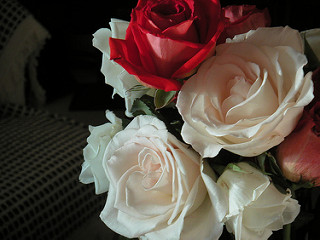

In [56]:
PIL.Image.open(str(roses[1]))

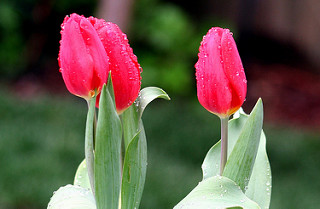

In [57]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [58]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [60]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [61]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/.ipynb_checkpoints'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg')]

In [62]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\.ipynb_checkpoints'

In [77]:
from pathlib import Path
import cv2

# Correct root directory (only ONE 'flower_photos')
data_dir = Path('./datasets/flower_photos/flower_photos')

# Get a list of rose images
roses = list((data_dir / 'roses').glob('*.jpg'))
print(f"Found {len(roses)} rose images")

# Try loading the first valid one
for img_path in roses:
    print("Trying:", img_path)
    img = cv2.imread(str(img_path))
    if img is not None:
        print("✅ Loaded:", img.shape)
        resized = cv2.resize(img, (180, 180))
        print("Resized:", resized.shape)
        break
    else:
        print("❌ Failed to load:", img_path)


Found 641 rose images
Trying: datasets\flower_photos\flower_photos\roses\10090824183_d02c613f10_m.jpg
✅ Loaded: (240, 179, 3)
Resized: (180, 180, 3)


In [78]:
#the above is actually loading the size of roses
#as the model will take same size for all the images 
#therefore we need to resize it with (180,180)

In [88]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    images = list((data_dir/flower_name).glob('*.jpg'))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [89]:
type(X)

list

In [90]:
#just making it numpy array so that model should take it 
#earlier X was in list , the model dont take list
X = np.array(X)
y = np.array(y)

In [91]:
type(X)

numpy.ndarray

In [92]:
#now the sample is ready just need to train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [93]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [94]:
num_classes = 5
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5) 

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - accuracy: 0.2887 - loss: 1.6895
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.5569 - loss: 1.0981
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.6672 - loss: 0.8676
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 197ms/step - accuracy: 0.7442 - loss: 0.7058
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.8369 - loss: 0.4753


In [95]:
#16,32,64 are the filters 
#3 is the kernel_size eventually means 3,3 
#MaxPooling2D() this means pooling layer default as (2,2)

In [96]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6045 - loss: 1.2015


[1.200020432472229, 0.6143791079521179]

In [97]:
#as YOu can clearly see that during training the model is having an accuracy of 83%
#but on actual testing, it is having just 60%
#this means there is obv some overfitting going on 


In [98]:
#Now , DATA AUGMENTATION comes into picture to resolve this issue and have better accuracy

In [105]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

C:\Users\Ankit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


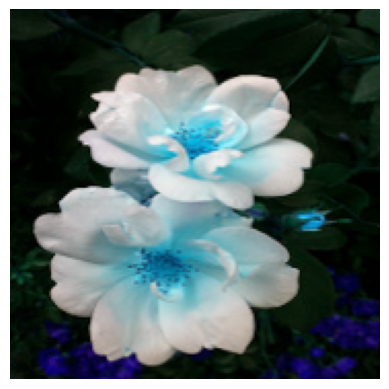

In [106]:
plt.axis('off')
plt.imshow(X[0])

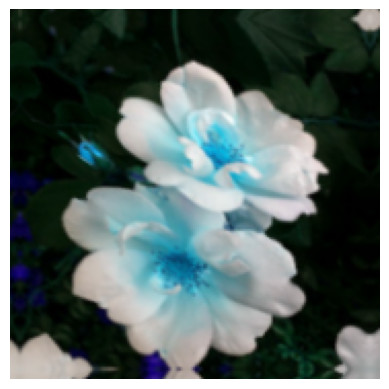

In [107]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [108]:
num_classes = 5

model = Sequential([
  data_augmentation,

    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=5) 

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 273ms/step - accuracy: 0.2955 - loss: 1.5508
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.5375 - loss: 1.1521
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.6118 - loss: 0.9857
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.6582 - loss: 0.9066
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - accuracy: 0.6850 - loss: 0.8383


In [109]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6537 - loss: 0.8891


[0.8994366526603699, 0.6633986830711365]

In [110]:
#now the accuracy is pretty much it goes from 60% to 66%

In [111]:
#if there will be more epochs running then the accuracy turns out to tbe pretty good